In [1]:
import numpy as np
from itertools import product

def show_kernel(kernel, label=True, digits=None, text_size=28):
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)
    
#     plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max() + kernel.min())/2
    
#     optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val, color=color, size=text_size,
                     horizontalalignment='center',
                     verticalalignment='center')
    
    plt.xticks([])
    plt.yticks([])

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=54, kernel_size=3, activation='relu') # activation is None
])

2022-11-04 16:06:12.252446: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-11-04 16:06:13.212201: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-11-04 16:06:13.241276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-04 16:06:13.241641: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 computeCapability: 6.1
coreClock: 1.493GHz coreCount: 5 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2022-11-04 16:06:13.241667: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-11-04 16:06:13.243437: I tensorflow/stream_executor/pl

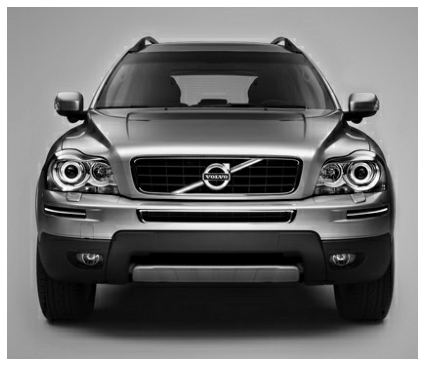

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image, channels=1)

plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

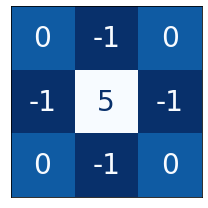

In [22]:
import tensorflow as tf

# edge detect
# kernel = tf.constant([
#     [-1, -1, -1],
#     [-1,  8, -1],
#     [-1, -1, -1],
# ])

# # bottom sobel
# kernel = tf.constant([
#     [-1, -2, -1],
#     [0,  0, 0],
#     [1, 2, 1],
# ])

# emboss
# kernel = tf.constant([
#     [-2, -1, 0],
#     [-1,  1, 1],
#     [0, 1, 2],
# ])

# sharpen
kernel = tf.constant([
    [0, -1, 0],
    [-1,  5, -1],
    [0, -1, 0],
])

plt.figure(figsize=(3,3))
show_kernel(kernel)

In [23]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

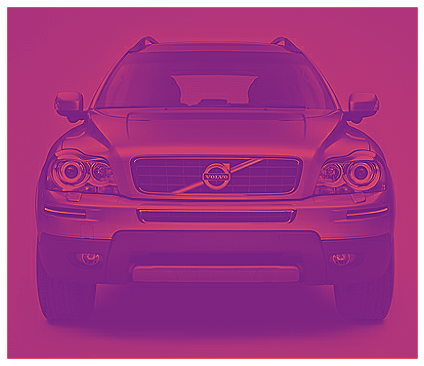

In [24]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

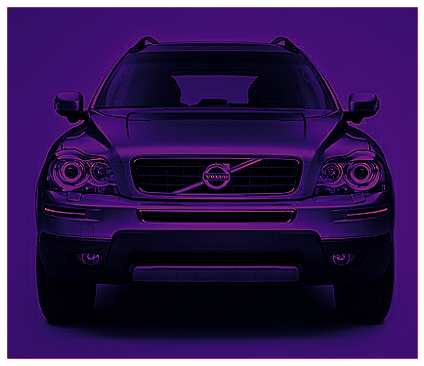

In [25]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();